In [18]:
!pip3 install pandas openpyxl matplotlib mplfinance plotly yfinance

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
nome_acao = 'AAPL' # Apple
data_inicio='2023-01-01' # Data de início
data_final='2023-12-31' # Data final

In [21]:
df_original = yf.download(
    nome_acao,
    start=data_inicio,
    end=data_final)
df_original

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [22]:
df = df_original.copy()
df.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fechamento_ajustado', 'volume']
df

,abertura,maximo,minimo,fechamento,fechamento_ajustado,volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [23]:
df = df.rename_axis('data')
df

,abertura,maximo,minimo,fechamento,fechamento_ajustado,volume
data,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


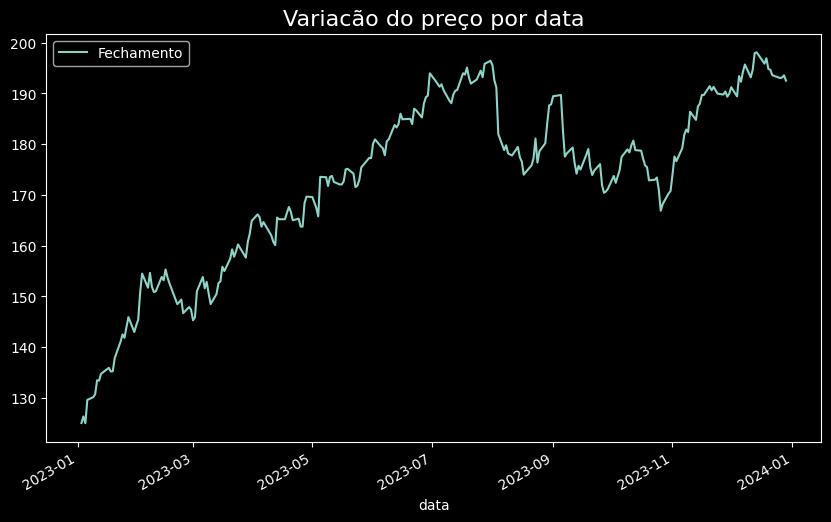

In [24]:
df['fechamento'].plot(figsize=(10,6))
plt.title('Variacão do preço por data', fontsize = 16)
plt.legend(['Fechamento'])

In [25]:
df_menor = df.head(60).copy()
df_menor['data'] = df_menor.index
df_menor['data'] = df_menor['data'].apply(mdates.date2num)
df_menor

,abertura,maximo,minimo,fechamento,fechamento_ajustado,volume,data
data,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500,19360.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,19361.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700,19362.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700,19363.0
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800,19366.0
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.837662,63896200,19367.0
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.578842,69458900,19368.0
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.499374,71379600,19369.0
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.840164,57809700,19370.0


In [26]:
def get_candle_color(i, df):
    if (df['fechamento'].iloc[i] > df['abertura'].iloc[i]):
        return 'green'
    return 'red'

def plot_candle(ax, i, df, color):
    data = df['data'].iloc[i]
    minimo = df['minimo'].iloc[i]
    maximo = df['maximo'].iloc[i]
    abertura = df['abertura'].iloc[i]
    fechamento = df['fechamento'].iloc[i]

    ax.plot([data, data],
            [minimo, maximo],
            color=color,
            linewidth=1)
    
    width = 0.7
    
    ax.add_patch(plt.Rectangle(
        (data - width/2, min(abertura, fechamento)),
        width,
        abs(fechamento - abertura),
        facecolor=color
    ))

def calculate_media_movel(df, numero_dias):
    return df['fechamento'].rolling(window=numero_dias).mean()

# Não funcionou
# def plot_media_movel(ax, df, nome_coluna, color, label):
#     ax.plot(
#         df['data'],
#         df[nome_coluna],
#         color=color,
#         label=label)

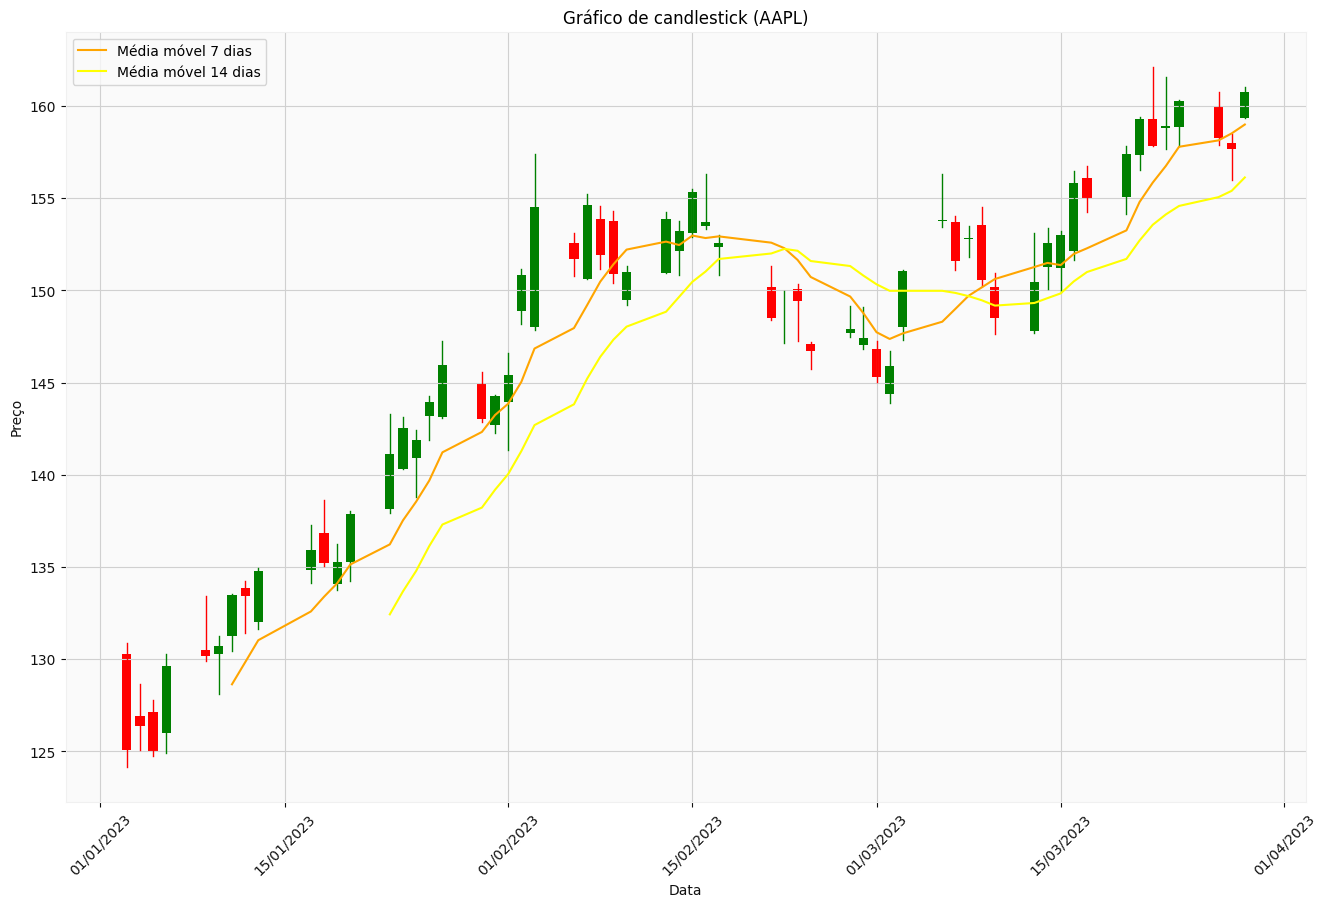

In [33]:
fig, ax = plt.subplots(figsize=(16,10))

for i in range(len(df_menor)):
    color = get_candle_color(i, df_menor)
    plot_candle(ax, i, df_menor, color)

df_menor['media_movel_7_dias'] = calculate_media_movel(df_menor, 7)
df_menor['media_movel_14_dias'] = calculate_media_movel(df_menor, 14)

ax.plot(
    df_menor['data'],
    df_menor['media_movel_7_dias'],
    color='orange',
    label='Média móvel 7 dias')

ax.plot(
    df_menor['data'],
    df_menor['media_movel_14_dias'],
    color='yellow',
    label='Média móvel 14 dias')

ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)

plt.title('Gráfico de candlestick (%s)'%nome_acao)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [28]:
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=('Candlestick', 'Volume'),
    row_width=[0.2, 0.7])

fig.add_trace(
    go.Candlestick(
        x=df_menor.index,
        open=df_menor['abertura'],
        high=df_menor['maximo'],
        low=df_menor['minimo'],
        close=df_menor['fechamento'],
        name='Candlestick'),
    row=1,
    col=1)

fig.add_trace(
    go.Scatter(
        x=df_menor.index,
        y=df_menor['media_movel_7_dias'],
        mode='lines',
        name='Média móvel 7 dias'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_menor.index,
        y=df_menor['media_movel_14_dias'],
        mode='lines',
        name='Média móvel 14 dias'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Bar(
        x=df_menor.index,
        y=df_menor['volume'],
        name='Volume'
    ),
    row=2,
    col=1
)

fig.update_layout(
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False,
    width=1100,
    height=600
)

fig.show()

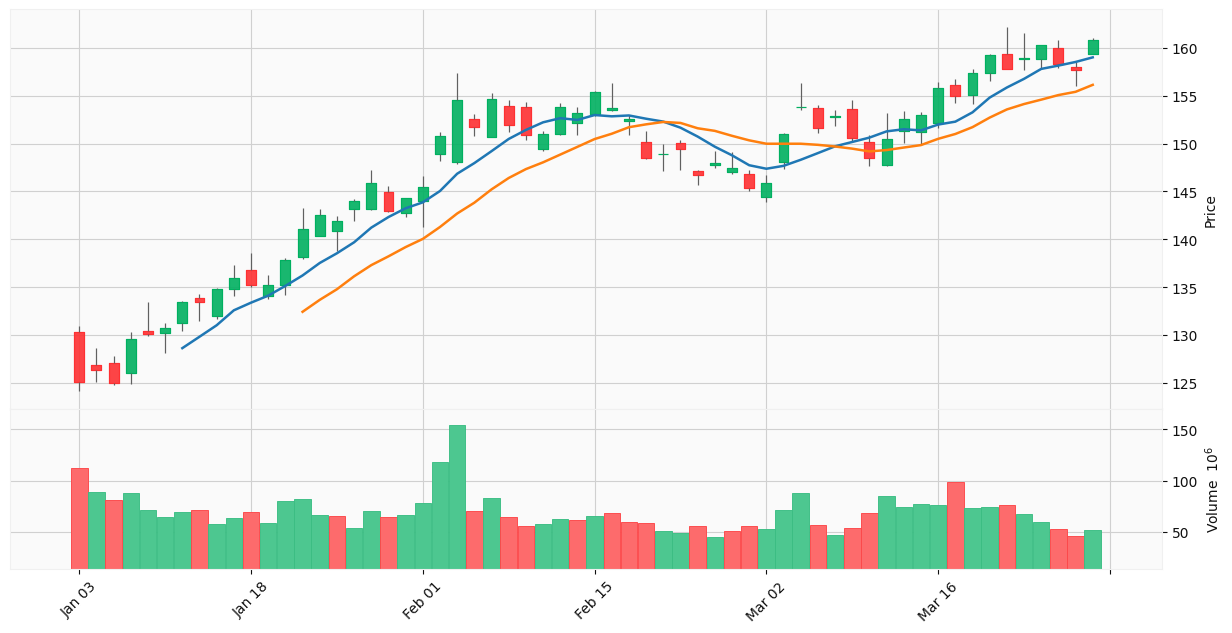

In [29]:
mpf.plot(
    df_original.head(60),
    type='candle',
    figsize=(16,8),
    volume=True,
    mav=(7,14),
    style='yahoo'
)